# **Muon lab -- DATA ANALYSIS**
joey.staa@fysik.lu.se
roman.nepeivoda@fysik.lu.se

---


During the labs, you constructed an experimental setup which measured the decay times of cosmic muons and stored them in a [histogram](https://en.wikipedia.org/wiki/Histogram).
Since the decay has a probabilistic nature, the measured lifetimes will vary. However, the histogram will follow an exponential distribution $\exp(-t / \tau)$.

In this data analysis, you now need to extract the $\tau$ parameter from the data by "fitting" the histogram.

To navigate through this notebook, click on a cell and press Shift+Enter to execute it and move to the next one. Double-click a cell to modify the code in a cell.

Once you have worked your way through this notebook and you have obtained your estimate of the muon lifetime, you need to compare it to the currently established experimental value, which can be found somewhere at http://pdg.lbl.gov/

Good luck!


#1. Upload the file
Let's start with uploading the data file. Execute the following cell and upload the text file from your lab session containing the measured data.

In [ ]:
from google.colab import files

uploaded = files.upload()
filenames = uploaded.keys()

for filename in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=filename, length=len(uploaded[filename])))

#2. Getting the bins and bin contents of the histogram

**To do:**

1. As you can see by the printout from running the cell below, the code currently isn't appending all the channels/bins to the list of values. Open the data file, check what line the actual data starts, and change the range of the if statement to correctly capture all the channels of your data set


In [15]:
import io
file = uploaded[filename] # This is only correct if uploading 1 file
data_path = io.StringIO(file.decode('utf-8'))
lines = data_path.readlines()

data_start = 10
data_end = 100

linenumber = 0
values = []
for line in lines:
  if data_start < linenumber< data_end:
    print(line)
    values.append(float(line.split()[1]))
    values.append(float(line.split()[2]))
    values.append(float(line.split()[3]))
    values.append(float(line.split()[4]))
  linenumber += 1

In [21]:
file = open('r', )
print(file)


         0:    0.00000E+000    7.00000E+000    1.40000E+001    2.50000E+001
0         4:    1.40000E+001    1.10000E+001    1.2...                     
1         8:    1.70000E+001    1.30000E+001    8.0...                     
2        12:    8.00000E+000    1.40000E+001    1.5...                     
3        16:    1.20000E+001    1.00000E+001    1.1...                     
4        20:    8.00000E+000    1.40000E+001    1.2...                     
..                                                 ...                     
122     492:    2.00000E+000    3.00000E+000    0.0...                     
123     496:    2.00000E+000    2.00000E+000    0.0...                     
124     500:    1.00000E+000    2.00000E+000    1.0...                     
125     504:    0.00000E+000    0.00000E+000    0.0...                     
126     508:    0.00000E+000    0.00000E+000    0.0...                     

[127 rows x 1 columns]


We know from the set-up that we have 511 channels. We will represent these using a list of numbers ranging form 0 to 511.

**Todo:**

1. From the print below you can see that the current code creates a list of 100 entries from 10-109. change this to correctly represent the channels of our setup.

NOTE: The lines of code that are commented out are for rebinning the histogram, which is a procedure that will be addressed towards the end of this notebook.

In [16]:
import numpy as np
bins = np.arange(0,512) # Creates a list of 100 values [10 - 109]
print(len(bins))
print(values)
print(bins)


#i=0
#values2=[]
#bins2=[]
#while i<len(values):
  #values2.append(values[i+0]+values[i+1]+values[i+2]+values[i+3])
  #bins2.append((bins[i+0]+bins[i+1]+bins[i+2]+bins[i+3])/4)
  #i+=4

# We turn both the bins and values into NumPy (np) arrays, since these are easier to work with later on
values = np.array(values)
bins = np.array(bins)
#values = np.array(values2)
#bins = np.array(bins2)

assert len(bins)==len(values), "Your list of channels/bins is not the same size as your list of values"

512
[]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

AssertionError: Your list of channels/bins is not the same size as your list of values

#3. Plot the calibration data

Currently, with the channel number as our bins, the final plot will display channel number on the x-axis and not time. To change the channel number to represent time, we need to do a calibration. We start by plotting our calibration data:

**Todo:**

1. Change the default calibration data in the cell below to your own calibration that you performed during the lab.

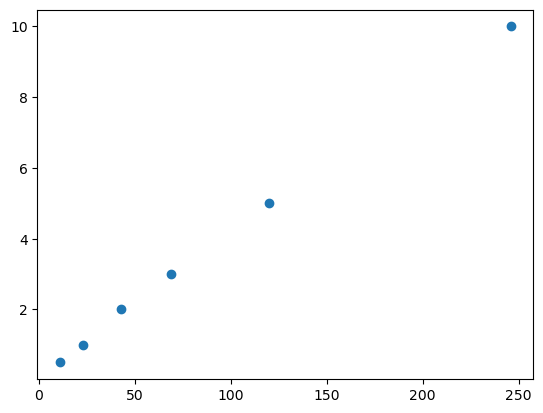

In [6]:
import matplotlib.pyplot as plt

# For simplicity we have the data for the calibration right here in the code
delta_T = np.array([0.5,1.0,2.0,3.0,5.0,10.0])
bin_number = np.array([11.,23.,43.,69.,120.,246.])

# Plotting using matplotlib
fig, ax = plt.subplots()
ax.errorbar(bin_number,delta_T,linestyle="none",marker="o")
plt.show()


In order to calibrate the channel number to a time we need to fit the calibration data, and apply the fit parameters to the bin numbers.

**Todo:**  

1.   Change the current definition of the "linearFunction", so that it actually represents a linear function.
2.   Change the print in the bottom to print the linar function in the form "y=ax+b", with your fit parameters "a" and "b"



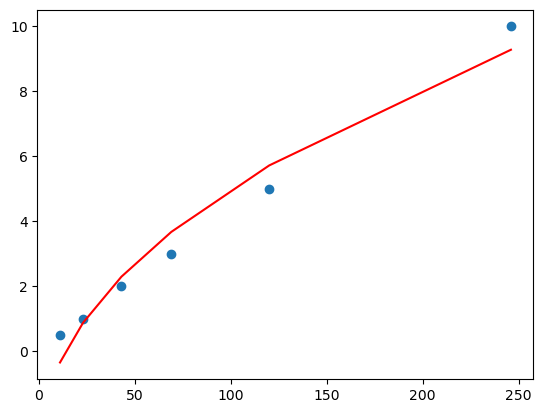

y = x^ 0.46096940552217486  + -3.36769852125227


In [7]:
from scipy.optimize import curve_fit

#Define a linear function
def linearFunction(x,a,b):
  return (x**a)+b

# We then call SciPy curve fit with our function,
# independent variable (bin_number), and dependent variable (delta_T).
# This returns the fit parameters "a" and b
# as well as some erros that we'll look into further later on
fitParameters_linear, fitErrorMatrix_linear = curve_fit(linearFunction, bin_number, delta_T)

# Plot the calibration data and the fit on the same canvas
fig, ax = plt.subplots()
ax.errorbar(bin_number,delta_T, label='Calibration data',linestyle="none",marker="o")
ax.errorbar(bin_number, linearFunction(bin_number, *fitParameters_linear), label='Fit',color="red")
plt.show()

# Print the fit parameters to see that they make sense
print("y =","x^",fitParameters_linear[0]," +",fitParameters_linear[1])

# 4. Apply the calibration to your bins so that they represent time rather than bin number and plot the muon data

**Todo:**

1.   From the faulty calibration that you fixed, the "calibratedBins" are defined by the original "bins" using a power function. change this to the correct linear function using the linear fit parameters that you obtained above



ValueError: weights should have the same shape as x

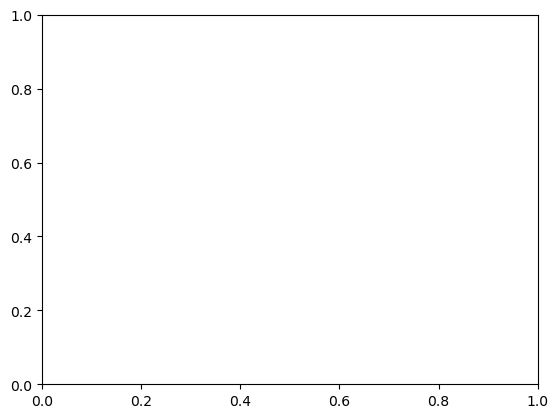

In [8]:
# With the bins as a NumPy array, applying the calibration is simple.
# Just add the array "bins" as x with the linear fit parameters you
# obtained earlier
calibratedBins = bins**fitParameters_linear[0] + fitParameters_linear[1]

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(calibratedBins, weights=values,bins=len(values))
plt.show()

#5. Justify removing the first and last bin
With our setup, any considered bin contains the number of counts between times t, and t+\Delta t. Since we don't know the shortest time we can measure with our setup, it means that our shortest time for the lowest bin might be somewhere between t and t+ \Delta t for that first bin. Due to this, we expect the number of counts in that bin will get smaller than the true value.

With this, we justify removing the first couple of bins if the histogram above if these first bins look weird. All the data sets are different, sometimes you can remove only the first bin, sometimes the first 3

**Todo:**

1. In the current code, I have removed the first 10 bins wihtout justification. I want you to look at your histogram above and justify which bins to remove, and then remove those bins

[]


ValueError: weights should have the same shape as x

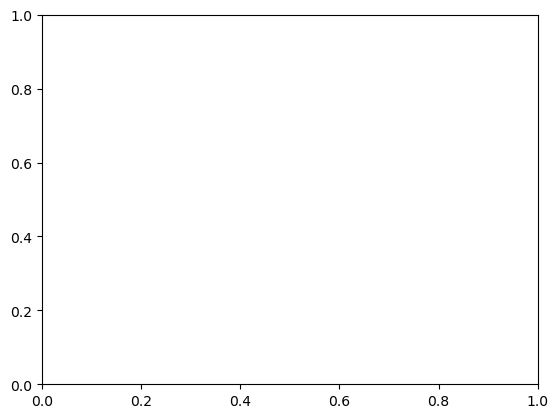

In [9]:
truncation = 10

truncated_calibratedBins=calibratedBins[truncation:]
truncated_values=values[truncation:]
print(truncated_values)

fig, ax = plt.subplots()
ax.hist(truncated_calibratedBins, weights=truncated_values,bins=len(values))
plt.show()

#6. Fit the muon data

**Todo:**

1. In the original code below, I am fitting the calibrated data with a linear function as you can see by the definition of "exponentialFunction" below. This "works" for the original code, because the calibration was done wrong. If you have done the calibration correctly with a linear function you should chage the "exponentialFunction" into an exponential function, found in the lab manual.

Then define the fit function:

In [ ]:
def exponentialFunction(x,A,tau,b):
  return A*x/tau+b

Run a scipy curve_fit on the data

In [ ]:
from scipy.optimize import curve_fit
fitParameters_exponential, fitErrorMatrix_exponential = curve_fit(exponentialFunction, truncated_calibratedBins, truncated_values)

Set the vertixal error bars to \sqrt{y}, and the horizontal error bars to the bin width. We need to do this because the Matplotlib histogram does not support errorbars

In [ ]:
valueError = np.sqrt(np.array(truncated_values))
xError = len(truncated_calibratedBins)*[(truncated_calibratedBins[2]-truncated_calibratedBins[1])/2]

#7. Plot the fit in the same figure as the muon data

**Todo:**

1. Make appropriate labels to the x and y -axis, including units **IF** needed
2. Do the same for the legend

In [ ]:
fig, ax = plt.subplots()

# Simple plot
ax.errorbar(truncated_calibratedBins, truncated_values, yerr=valueError, xerr=xError, linewidth=0.5,linestyle="None", marker="o",markersize=1,label='$Blue markers$')
ax.errorbar(truncated_calibratedBins, exponentialFunction(truncated_calibratedBins, *fitParameters_exponential), label='Red line', color="red")

# Add necessities
# Axis labels
ax.set_xlabel(r"Wow, such $\frac{LaTeX}{support}$", ha='right', x=1.0)
ax.set_ylabel("You can add LaTeX characters like $\Delta$", ha='right', y=1.0)
# Legend 1
leg1 = ax.legend()

plt.show()

Print fitted parameters and uncertainties:

In [ ]:
perr = np.sqrt(np.diag(fitErrorMatrix_exponential)) # This is taken form the definition of
#curve_fit at https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
print("A:\t", fitParameters_exponential[0],"\t+/-",perr[0],"\ntau:\t", fitParameters_exponential[1],"\t+/-",perr[1], "\nb:\t", fitParameters_exponential[2],"\t+/-",perr[2])
print("\nThe muon lifetime is:",fitParameters_exponential[1],"+/-",perr[1],"\u03BCs")

#8. Chi^2

In [ ]:
f=exponentialFunction(truncated_calibratedBins, fitParameters_exponential[0], fitParameters_exponential[1], fitParameters_exponential[2])
y=truncated_values
sigma=valueError
lst=[]
for i in range(0,len(truncated_values)):
  if sigma[i]==0: continue
  lst.append(((f[i]-y[i])/sigma[i])**2)

chisquared = sum(lst)
ndf = (len(lst)-3)
print("X^2 = ",chisquared)
print("X^2/ndf = ",chisquared/ndf)
print("Degrees of freedom: ", ndf)

#9. Why is my Chi^2 << 1 ?!?!

This probably happened because your histogram contains very few counts. Because sigma is defined using the square-root, bins with a small number of counts will strongly affect the Chi-squared calculation and fitting.

A way to remedy this is to rebin your histogram. The code below combines every four bins in the original histogram into one new bin. This way, you end up with fewer bins with low counts.

**ToDo**
1. Go back to step 3 of the analysis (Getting the bins and bin content of the histogram) and uncomment the rebinning procedure.
2. Go through the notebook one more time using the rebinned data. Make sure that you apply a different truncation to the histogram if necessary!

#10. Why is my muon lifetime ~1.6 micro seconds ?!?!

Don't worry, that's what I get for some datasets as well.

**Todo:**
In the discussion of your report I want you to discuss two things:
1. How you could improve your result if you had more resources (time, computing power, money etc.)
2. How you could improver your results with what you already have